# Corrections for extinction

In this notebook, we create and return a file of the extinction-corrected magnitudes.

In [1]:
#Import stuff
import numpy as np 
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

#### Import the Galfit results

In [2]:
#Galfit_res = fits.open('Galfit_final_IDs.fits')
Galfit_res = fits.open('y3_gold_2_2_lsbg_galfit_v4.0.fits')
Galfit_res[1].header.keys
# =====================================================
# =====================================================
object_id_LSBGs = Galfit_res[1].data["COADD_OBJECT_ID"]

ra = Galfit_res[1].data["RA"]
dec = Galfit_res[1].data["DEC"]

for i in range(len(ra)):
    if (ra[i]>150):
        ra[i] = ra[i]-360

# Magnitudes
mag_g = Galfit_res[1].data["MAG_G"]
mag_r = Galfit_res[1].data["MAG_R"]
mag_i = Galfit_res[1].data["MAG_I"]

# SExtractor (MAG_AUTO) magnitudes
# Magnitudes
mag_auto_g = Galfit_res[1].data["MAG_AUTO_G"]
mag_auto_r = Galfit_res[1].data["MAG_AUTO_R"]
mag_auto_i = Galfit_res[1].data["MAG_AUTO_I"]


#mu_mean_g_sextractor = Galfit_res[1].data["MU_MEAN_G"]
#Galfit_res[1].header.keys
#print(max(mag_g))

#### Import the Extinction Results

In [3]:
Ext_res = fits.open('Extinction.fits')
Ext_res[1].header.keys
object_id_EXT = Ext_res[1].data["COADD_OBJECT_ID"]
Ext_ebv_sfd98 = Ext_res[1].data["ebv_sfd98"]

Now create a dataframe that contains the coadd_ids of all objects passing the criteria and the coadd_ids of the LSBGs.

In [4]:
df_all = pd.DataFrame({'all_coadds':np.asarray(object_id_EXT)})
df_LSBGs =  pd.DataFrame({'LSBG_coadds':np.asarray(object_id_LSBGs)})

In [5]:
mask = df_all['all_coadds'].isin(object_id_LSBGs)

object_ids_true = object_id_EXT[mask]
print(len(object_ids_true))
 
extinction = Ext_ebv_sfd98[mask]

21286


In [6]:
sort = np.argsort(object_ids_true)

print(object_ids_true[sort])

ext_sort = extinction[sort]

[ 61426632  61440630  61444588 ... 618572837 618636165 618665124]


### Correct the magnitudes for extinction

mag_g = mag_g - 3.186$\times$ebv_sfd98

mag_r = mag_r - 2.140$\times$ebv_sfd98

mag_i = mag_i - 1.569$\times$ebv_sfd98

In [7]:
# Correct the galfit magnitudes
mag_g_cor = mag_g - 3.186*ext_sort
mag_r_cor = mag_r - 2.140*ext_sort
mag_i_cor = mag_i - 1.569*ext_sort

# Correct the mag_auto magnitudes
mag_auto_g_cor = mag_auto_g - 3.186*ext_sort
mag_auto_r_cor = mag_auto_r - 2.140*ext_sort
mag_auto_i_cor = mag_auto_i - 1.569*ext_sort

In [8]:
np.savetxt('Galfit_mags.dat', np.c_[mag_g_cor, mag_r_cor, mag_i_cor], fmt='%.6f %.6f %.6f' )
np.savetxt('SExtractor_mags.dat', np.c_[mag_auto_g_cor, mag_auto_r_cor, mag_auto_i_cor], fmt='%.6f %.6f %.6f' )

In [9]:
print(np.max(ext_sort)*3.186)

0.6747310696542262


(array([7.200e+01, 1.026e+03, 3.049e+03, 2.918e+03, 2.488e+03, 2.197e+03,
        1.854e+03, 1.496e+03, 1.196e+03, 9.190e+02, 7.320e+02, 5.620e+02,
        4.870e+02, 3.760e+02, 3.220e+02, 2.860e+02, 2.090e+02, 2.120e+02,
        1.370e+02, 1.050e+02, 1.180e+02, 7.700e+01, 5.700e+01, 5.100e+01,
        4.200e+01, 3.900e+01, 4.500e+01, 3.100e+01, 3.500e+01, 3.200e+01,
        1.700e+01, 1.800e+01, 1.300e+01, 9.000e+00, 8.000e+00, 9.000e+00,
        3.000e+00, 5.000e+00, 9.000e+00, 3.000e+00, 1.000e+00, 7.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.00203   , 0.006225  , 0.01042   , 0.014615  , 0.01881   ,
        0.023005  , 0.0272    , 0.031395  , 0.03559   , 0.039785  ,
        0.04398   , 0.048175  , 0.05237   , 0.056565  , 0.06076   ,
        0.064955  , 0.06915   , 0.073345  , 0.07754   , 0.081735  ,
        0.08593   , 0.090125  , 0.09432   , 0.098515  , 0.10271   ,
        0.106905  , 0.1111    , 0.11

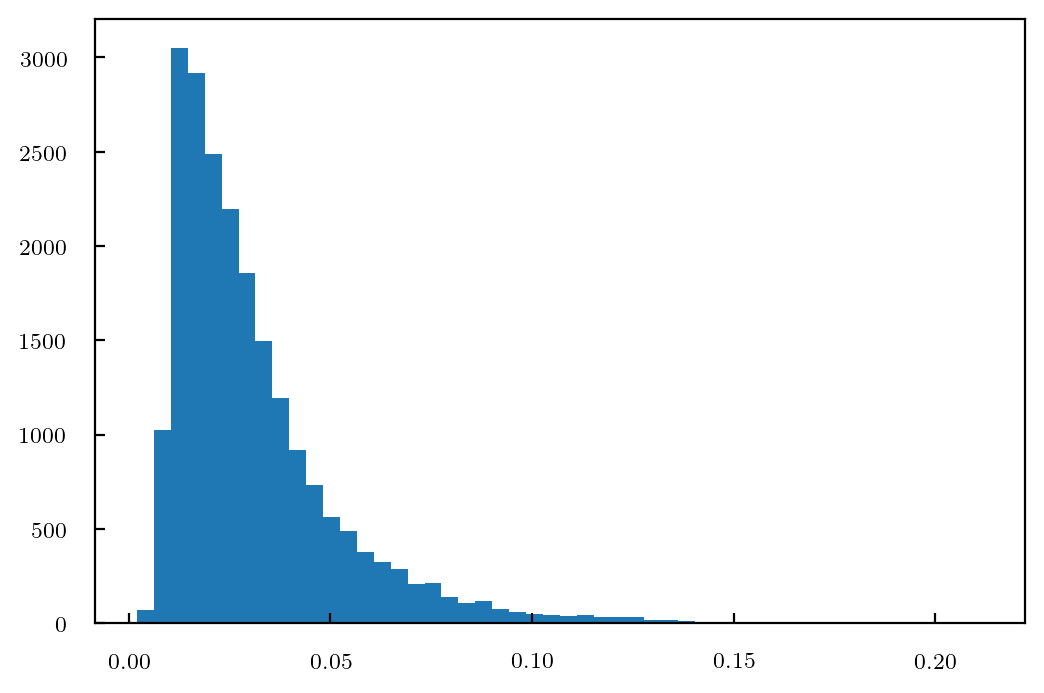

In [10]:
plt.hist(ext_sort,bins=50)

In [11]:
print(np.median(ext_sort))

0.02501


In [12]:
0.025*1.617

0.040425

In [13]:
#plt.scatter(ra[ext_sort>0.05],dec[ext_sort>0.05],s=0.02)

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


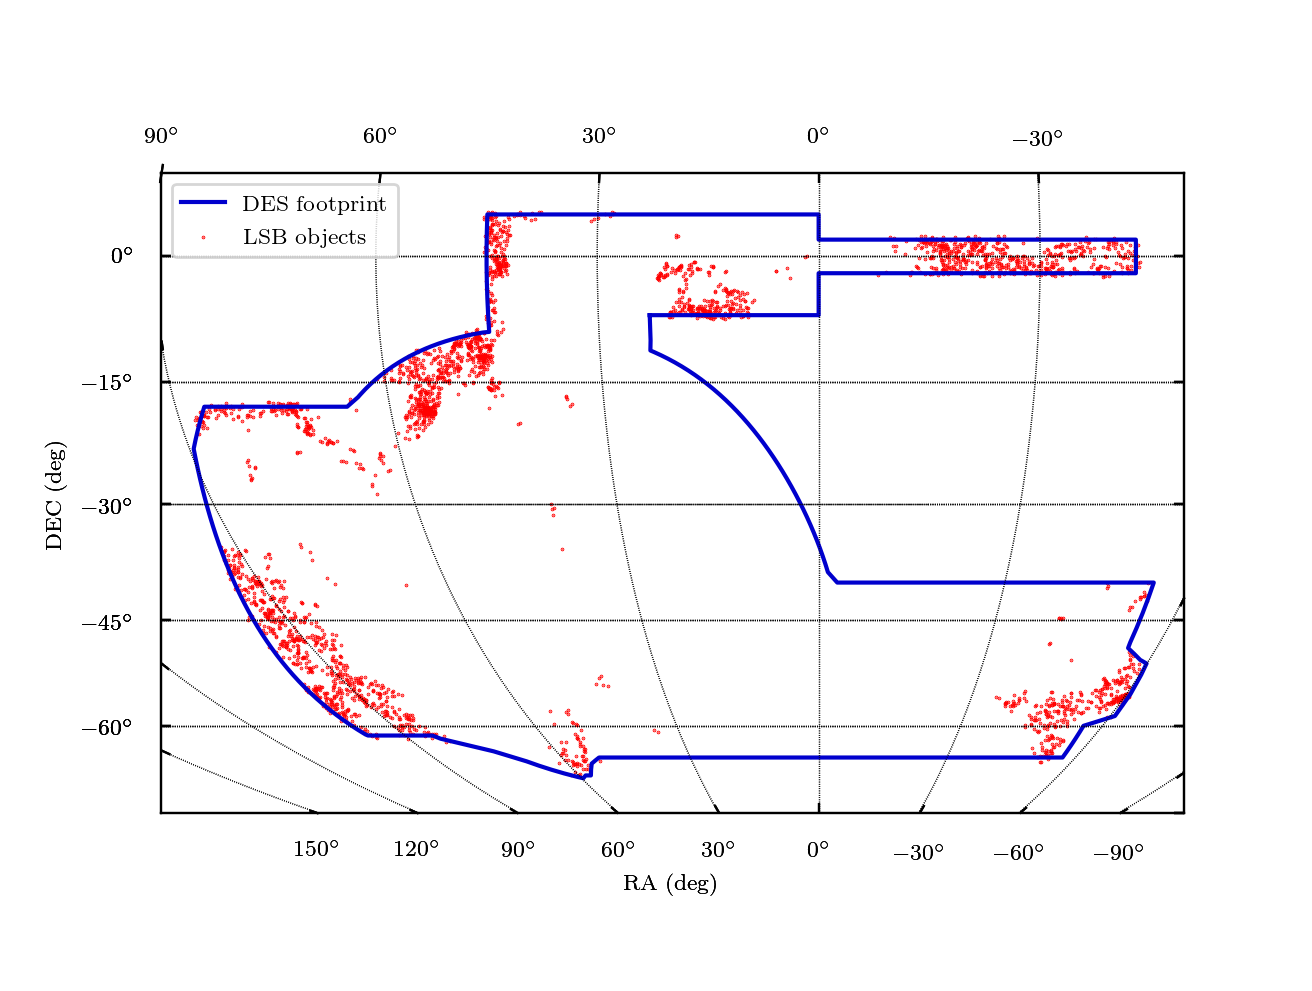

In [15]:
import skymap as smap
from skymap import DESSkymap
plt.figure(figsize = (6.6,5.0))
smap = DESSkymap()
smap.scatter(ra[ext_sort>0.05],dec[ext_sort>0.05], c='red',rasterized=True, s=0.09,latlon=True, label="LSB objects")
smap.draw_des(color='mediumblue',  linewidth=1.5, label='DES footprint')

plt.xlabel("RA (deg)", fontsize=15)
plt.ylabel("DEC (deg)", fontsize=15)


plt.legend(frameon=True, loc='upper left', fontsize=8)

plt.tight_layout()
#plt.savefig('Train_set_footprint.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

In [16]:
mu_mean_sextractor_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(10), unpack=3) 
coadd_sextractor = np.loadtxt("LSBGs_properties_tot.dat", usecols=(0), unpack=3)

mask = np.isin(coadd_sextractor,object_id_LSBGs)

mu_keep = mu_mean_sextractor_g[mask]
print(len(object_id_LSBGs))

21286


In [17]:
R_eff = 0.263*Galfit_res[1].data["RE_G"]
mu_mean_g = mag_g + 2.5*np.log10(2.0*np.pi*(R_eff**2.0))

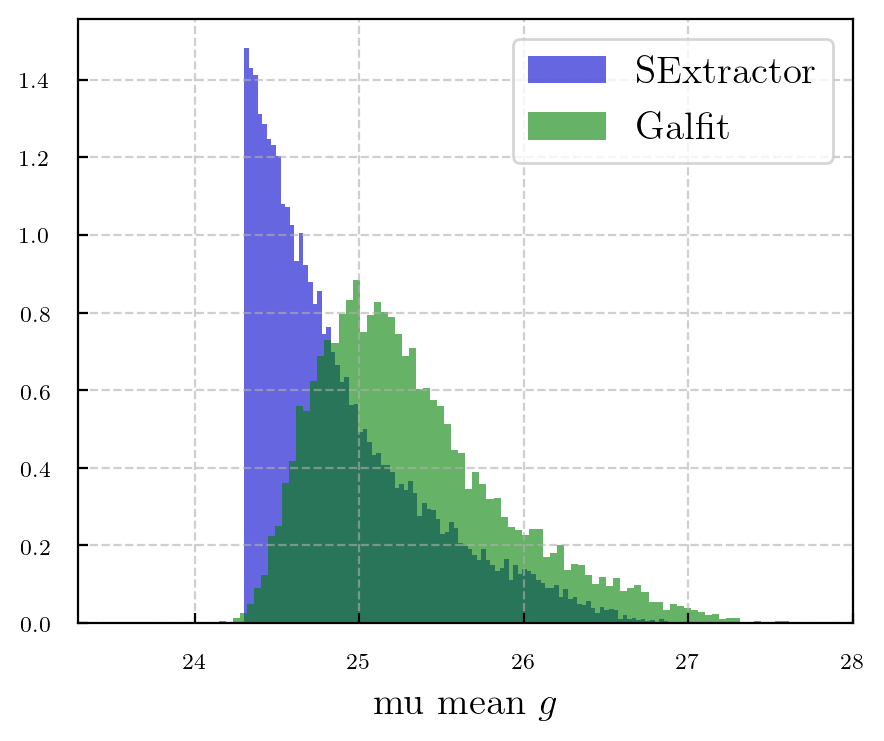

In [26]:
plt.figure(figsize=(5.0,4.0))
#plt.tick_params(axis='both', labelsize=12)

plt.hist(mu_keep, bins=100, color='mediumblue', alpha=0.6,density=True, label='SExtractor')

plt.hist(mu_mean_g, bins=100, color='green', alpha=0.6,density=True, label='Galfit')


plt.grid(ls='--', axis='both' ,alpha=0.6)


plt.legend(frameon=True, loc='upper right', fontsize=14)
#plt.xlim(23,16)
plt.xlabel('mu mean $g$', fontsize=14)
#plt.ylabel('Normalized frequency', fontsize=14)


#plt.tight_layout()
plt.savefig('mag_plots.png', dpi=100)
plt.show()